# Importing Cancer Datasets from sklearn.datasets

## Building a Classifier that can segregate Benign from Malignant

### Since the target variable is binary, LogisticRegression should fullfil the task.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
#OVERVIEW OF THE DATASET
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [6]:
#FEATURES
ft = cancer.feature_names
ft

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
dt = cancer.data
dt

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
import pandas as pd
pd.set_option("display.max_columns",None)
df = pd.DataFrame(dt,columns=ft)
dic = {0:"malignant",1:"benign"}
df["target"] = cancer.target
df["target_name"] = df["target"].map(dic)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [9]:
print("dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

dataframe has 569 rows and 32 columns


In [10]:
#LET'S DO VISUALIZATION TO SEE HOW WELL THE TARGET VARIABLE CAN BE SEPERATED

In [11]:
import matplotlib.pyplot as plt
import numpy as np

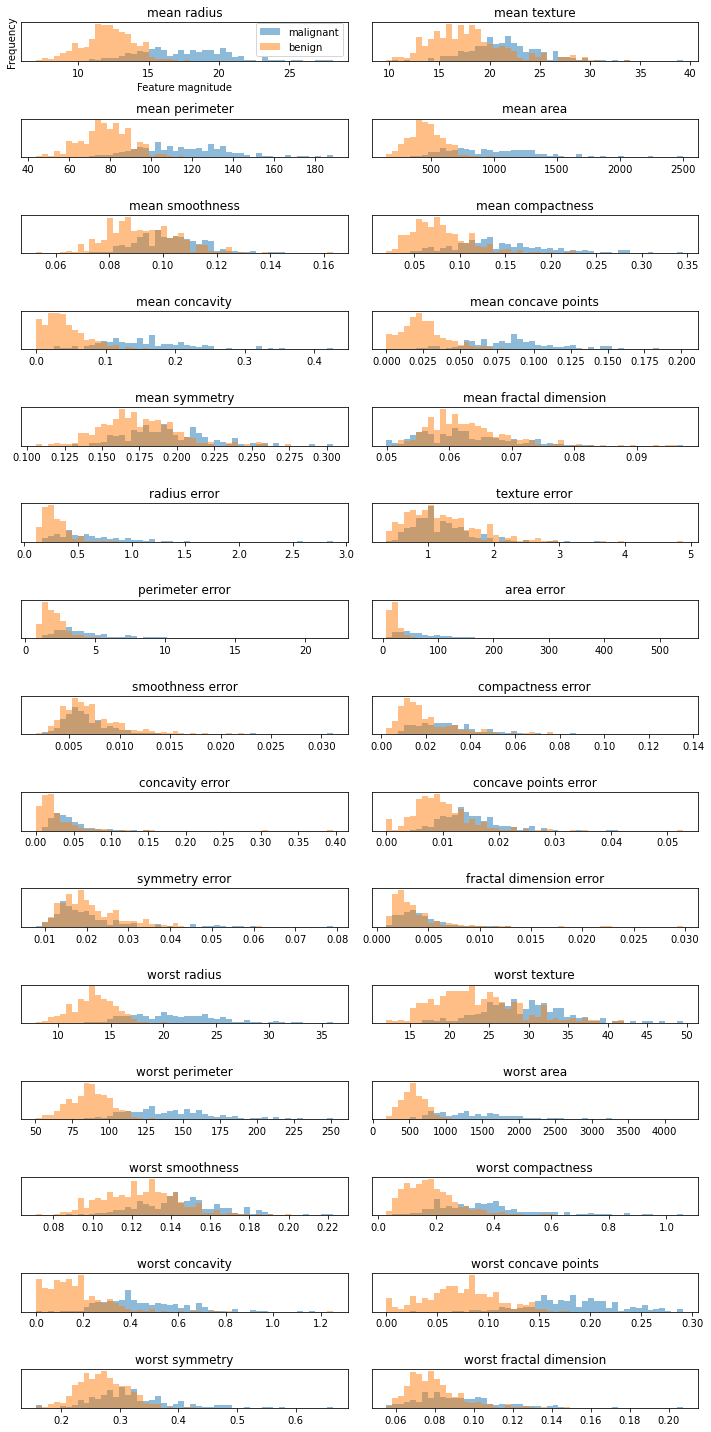

In [12]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [13]:
#LET'S BUILD OUR CLASSIFIER

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,random_state=0)
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)
log = LogisticRegression(max_iter=1000)
log.fit(xtrain,ytrain)
print("log score on train data ", log.score(xtrain,ytrain))
print("log score on test data ", log.score(xtest,ytest))

log score on train data  0.9577464788732394
log score on test data  0.958041958041958


C:\Users\Sidi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# let's how it will perform on scaled data
log.fit(xtrain_scaled,ytrain)
print("log score on scaled train data ", log.score(xtrain_scaled,ytrain))
print("log score on scaled test data ", log.score(xtrain_scaled,ytrain))

log score on scaled train data  0.9906103286384976
log score on scaled test data  0.9906103286384976


#### Well that's impressive scaled data has high impact on the accuracy

# In this part of the notebook we will try to find the clinic trial best suited for patient based on foresquere location data and users reviews.

## then we will try to cluster each region by its clincal trial

In [17]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [18]:
CLIENT_ID = 'Z1JHMU3FKCYUXJEMXDSPYSPMB0UGUPCS444ITU3X2OEEEOMC' # your Foursquare ID
CLIENT_SECRET = 'POVV2BNFHCTBN1DMPSGL4IAY3Y0MNXNUCDIORFGUBTDT0EPO' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z1JHMU3FKCYUXJEMXDSPYSPMB0UGUPCS444ITU3X2OEEEOMC
CLIENT_SECRET:POVV2BNFHCTBN1DMPSGL4IAY3Y0MNXNUCDIORFGUBTDT0EPO


In [19]:
address = 'New York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [20]:
search_query = 'clinic'
radius = 500
print(search_query + ' .... OK!')

clinic .... OK!


In [21]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Z1JHMU3FKCYUXJEMXDSPYSPMB0UGUPCS444ITU3X2OEEEOMC&client_secret=POVV2BNFHCTBN1DMPSGL4IAY3Y0MNXNUCDIORFGUBTDT0EPO&ll=40.7127281,-74.0060152&oauth_token=&v=20180604&query=clinic&radius=500&limit=30'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60551eb68f303b5dae2ed71c'},
 'response': {'venues': [{'id': '58accead9b7eac4e638c0b60',
    'name': 'BeAti Acupuncture Wellness Clinic',
    'location': {'address': '30 Vesey St Rm 1803',
     'lat': 40.712157,
     'lng': -74.009821,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.712157,
       'lng': -74.009821}],
     'distance': 327,
     'postalCode': '10007',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['30 Vesey St Rm 1803',
      'New York, NY 10007',
      'United States']},
    'categories': [{'id': '52e81612bcbc57f1066b7a3b',
      'name': 'Acupuncturist',
      'pluralName': 'Acupuncturists',
      'shortName': 'Acupuncturist',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1616191158',
    'hasPerk': False},
   {'id': '504782

In [23]:
# assign relevant part of JSON to venues
clinics = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(clinics)
dataframe.head()

<ipython-input-23-06b6b78586aa>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(clinics)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,58accead9b7eac4e638c0b60,BeAti Acupuncture Wellness Clinic,"[{'id': '52e81612bcbc57f1066b7a3b', 'name': 'A...",v-1616191158,False,30 Vesey St Rm 1803,40.712157,-74.009821,"[{'label': 'display', 'lat': 40.712157, 'lng':...",327,10007,US,New York,NY,United States,"[30 Vesey St Rm 1803, New York, NY 10007, Unit...",NaN
1,504782a6e4b0d157f07a7a3d,Securities Arbitration Clinic,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1616191158,False,NaN,40.716850,-74.007202,"[{'label': 'display', 'lat': 40.71685028076172...",469,10013,US,New York,NY,United States,"[New York, NY 10013, United States]",NaN
2,57b4370b498e1c18b4f69932,USA Vein Clinics,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1616191158,False,"122 Fulton Street, 5th Floor",40.709980,-74.007644,"[{'label': 'display', 'lat': 40.70998038944356...",335,10038,US,New York,NY,United States,"[122 Fulton Street, 5th Floor, New York, NY 10...",1359060289
3,5ce7b0a8829b0c002cddf1e6,Launchfit by Clinicube FiDi,"[{'id': '52e81612bcbc57f1066b7a3a', 'name': 'C...",v-1616191158,False,160 Broadway,40.709454,-74.010042,"[{'label': 'display', 'lat': 40.70945389, 'lng...",498,10038,US,New York,NY,United States,"[160 Broadway, New York, NY 10038, United States]",NaN


In [24]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,BeAti Acupuncture Wellness Clinic,Acupuncturist,30 Vesey St Rm 1803,40.712157,-74.009821,"[{'label': 'display', 'lat': 40.712157, 'lng':...",327,10007,US,New York,NY,United States,"[30 Vesey St Rm 1803, New York, NY 10007, Unit...",58accead9b7eac4e638c0b60
1,Securities Arbitration Clinic,Office,NaN,40.716850,-74.007202,"[{'label': 'display', 'lat': 40.71685028076172...",469,10013,US,New York,NY,United States,"[New York, NY 10013, United States]",504782a6e4b0d157f07a7a3d
2,USA Vein Clinics,Doctor's Office,"122 Fulton Street, 5th Floor",40.709980,-74.007644,"[{'label': 'display', 'lat': 40.70998038944356...",335,10038,US,New York,NY,United States,"[122 Fulton Street, 5th Floor, New York, NY 10...",57b4370b498e1c18b4f69932
3,Launchfit by Clinicube FiDi,Chiropractor,160 Broadway,40.709454,-74.010042,"[{'label': 'display', 'lat': 40.70945389, 'lng...",498,10038,US,New York,NY,United States,"[160 Broadway, New York, NY 10038, United States]",5ce7b0a8829b0c002cddf1e6


In [25]:
dataframe_filtered.name

0    BeAti Acupuncture Wellness Clinic
1        Securities Arbitration Clinic
2                     USA Vein Clinics
3          Launchfit by Clinicube FiDi
Name: name, dtype: object

In [27]:
clinic_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent the Clinic
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='USA Vein Clinics',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(clinic_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(clinic_map)

# display map
clinic_map